Panggil Library Atau Tools Yang Kita Gunakan Pada Proses Visualisasi Dataset Covid-19

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Panggil Dataset Yang Kita Butuhkan Ke Dalam Pemrograman Python

In [137]:
cases_conf = pd.read_csv('confirmed_acc.csv')
pasien = pd.read_csv('patient.csv')
provinsi = pd.read_csv('province.csv',encoding = 'unicode_escape')

Pada Tahapan Ini Kita Akan Melakukan Prediksi Kenaikan Kasus Covid-19 Tiap Harinya. Jadi Pertama-Tama Kita Import Dahulu Library Atau Tools Yang Kita Butuhkan.

In [138]:
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit

Sekarang Kita Lihat 4 Data Pertama Dari Dataset Kasus Yang Terkonfirmasi.

In [139]:
cases_conf.head()

,date,cases
0,1/22/2020,0
1,1/23/2020,0
2,1/24/2020,0
3,1/25/2020,0
4,1/26/2020,0


Selanjutnya Kita Konversi Data Tanggal Tersebut Menjadi Total Hari. Disini Kita Mengambil Data Tanggal Awal Yaitu 1 Maret 2020.

In [140]:
df = cases_conf.iloc[39:].copy()
df.loc[:, 'days']= df['date'].map(lambda x : (datetime.strptime(x, '%m/%d/%Y') - datetime.strptime("3/1/2020", '%m/%d/%Y')).days)
df[['date','days','cases']] #reorder column

,date,days,cases
39,3/1/2020,0,0
40,3/2/2020,1,2
41,3/3/2020,2,2
42,3/4/2020,3,2
43,3/5/2020,4,2
44,3/6/2020,5,4
45,3/7/2020,6,4
46,3/8/2020,7,6
47,3/9/2020,8,19
48,3/10/2020,9,27


Lalu Kita Buat Sebuah Function Atau Method Untuk Proses Prediksi Data Covid-19 Yang Kita Miliki. Disini Kita Menggunakan Library Bawaan Dari Python Ini Sendiri Tetapi Disini Kita Menentukan Nilai Parameter Yang Kita Gunakan Seperti Ini.

In [141]:
def gompertz(a, c, t, t_0):
    safe_exponent = np.clip(-c * (t - t_0), -100, 100)
    Q = a * np.exp(-np.exp(safe_exponent))
    return Q

x = list(df['days'])
y = list(df['cases'])

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9, test_size=0.1, shuffle=False)
x_test_added = x_test + list(range((max(x_test)+1), 60))
popt, pcov = curve_fit(gompertz, x_train, y_train, method='trf', bounds=([100, 0, 0],[6*max(y_train),0.15, 70]))
a, estimated_c, estimated_t_0 = popt
y_pred = gompertz(a, estimated_c, x_train+x_test_added, estimated_t_0)

y_pred

array([6.94453422e-03, 1.88295098e-02, 4.75043830e-02, 1.12095671e-01,
       2.48600952e-01, 5.20501753e-01, 1.03312552e+00, 1.95151092e+00,
       3.52071069e+00, 6.08657931e+00, 1.01143448e+01, 1.62018648e+01,
       2.50845667e+01, 3.76297134e+01, 5.48187449e+01, 7.77178331e+01,
       1.07438219e+02, 1.45089136e+02, 1.91726984e+02, 2.48304767e+02,
       3.15625683e+02, 3.94304201e+02, 4.84737062e+02, 5.87085640e+02,
       7.01270050e+02, 8.26974448e+02, 9.63662219e+02, 1.11059925e+03,
       1.26688317e+03, 1.43147639e+03, 1.60324086e+03, 1.78097279e+03,
       1.96343565e+03, 2.14939045e+03, 2.33762249e+03, 2.52696388e+03,
       2.71631192e+03, 2.90464320e+03, 3.09102366e+03, 3.27461503e+03,
       3.45467801e+03, 3.63057262e+03, 3.80175640e+03, 3.96778061e+03,
       4.12828520e+03, 4.28299265e+03, 4.43170126e+03, 4.57427802e+03,
       4.71065131e+03, 4.84080382e+03, 4.96476551e+03, 5.08260702e+03,
       5.19443348e+03, 5.30037872e+03, 5.40060007e+03, 5.49527359e+03,
      

Sekarang Kita Gambarkan Data Hasil Prediksi Tadi Ke Dalam Grafik / Plot. Disini Kita Membandingkan Antara Nilai Prediksi Dengan Data Aktual Yang Terjadi.

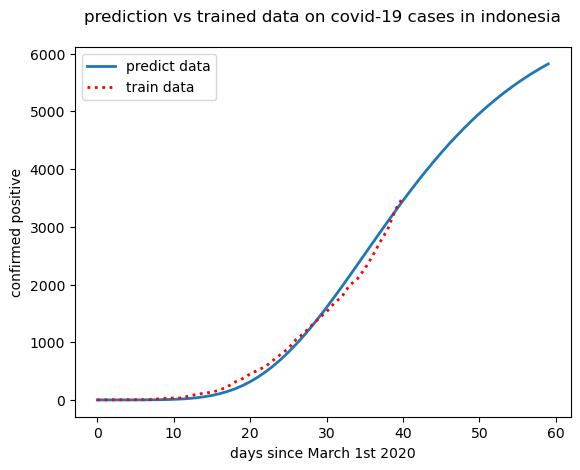

In [142]:
plt.plot(x_train+x_test_added, y_pred, linewidth=2, label='predict data') 
plt.plot(x, y, linewidth=2, color='r', linestyle='dotted', label='train data')
# plt.plot(x_test, y_test, linewidth=2, color='g', linestyle='dotted', label='test data')
plt.title('prediction vs trained data on covid-19 cases in indonesia\n')
plt.xlabel('days since March 1st 2020')
plt.ylabel('confirmed positive')
plt.legend(loc='upper left')

Kita Juga Dapat Melihat Hasil Data Prediksi Covid-19 Tadi Ke Dalam Bentuk Tabel. Disini Kita Melihat Hasil Prediksi Covid-19 60 Hari Ke Depannya.

In [143]:
prediksi = pd.DataFrame({'day_pred': x_test_added, 'cases_pred':np.around(y_pred[36:])})
prediksi

,day_pred,cases_pred
0,36,2716.0
1,37,2905.0
2,38,3091.0
3,39,3275.0
4,40,3455.0
5,41,3631.0
6,42,3802.0
7,43,3968.0
8,44,4128.0
9,45,4283.0


Pertama-Tama Kita Cek Terlebih Dahulu 5 Data Pertama Dari Dataset Pasien Tersebut.

In [144]:
pasien.head()

,patient_id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
0,1,female,31.0,indonesia,DKI Jakarta,released,NaN,2-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
1,2,female,64.0,indonesia,DKI Jakarta,released,1.0,2-Mar-20,16-Mar-20,NaN,RSPI Sulianti Saroso
2,3,female,33.0,indonesia,DKI Jakarta,released,1.0,6-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
3,4,female,34.0,indonesia,DKI Jakarta,isolated,1.0,6-Mar-20,NaN,NaN,RSPI Sulianti Saroso
4,5,male,55.0,indonesia,DKI Jakarta,isolated,1.0,8-Mar-20,NaN,NaN,RS Persahabatan


Selanjutnya Kita Lihat Informasi Dari Dataset Ini Seperti Banyaknya Data Dan Kolom Yang Digunakan Pada Dataset Ini.

In [145]:
pasien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      893 non-null    int64  
 1   gender          156 non-null    object 
 2   age             156 non-null    float64
 3   nationality     156 non-null    object 
 4   province        156 non-null    object 
 5   current_state   166 non-null    object 
 6   contacted_with  27 non-null     float64
 7   confirmed_date  893 non-null    object 
 8   released_date   5 non-null      object 
 9   deceased_date   4 non-null      object 
 10  hospital        17 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.9+ KB


Kita Hitung Banyaknya Kelompok Data Berdasarkan Kolom Current_state.

In [146]:
pasien['current_state'].value_counts()

current_state
isolated    143
deceased     15
released      8
Name: count, dtype: int64

Lalu Hitung Rata-Rata Umur Berdasarkan Kolom Gender Atau Jenis Kelamin Dari Pasien Yang Ada Pada Dataset Tersebut.

In [147]:
male = pasien.loc[pasien['gender']=='male','age'].mean()
female = pasien.loc[pasien['gender']=='female','age'].mean()
print('Distribusi rata-rata umur pasien laki-laki: %i' %male, 'tahun')
print('Distribusi rata-rata umur pasien perempuan: %i' %female, 'tahun')

Distribusi rata-rata umur pasien laki-laki: 48 tahun
Distribusi rata-rata umur pasien perempuan: 47 tahun


Selanjutnya Kita Lihat Visualisasi Data Ke Dalam Grafik Banyaknya Pasien Berdasarkan Kolom Current_state.

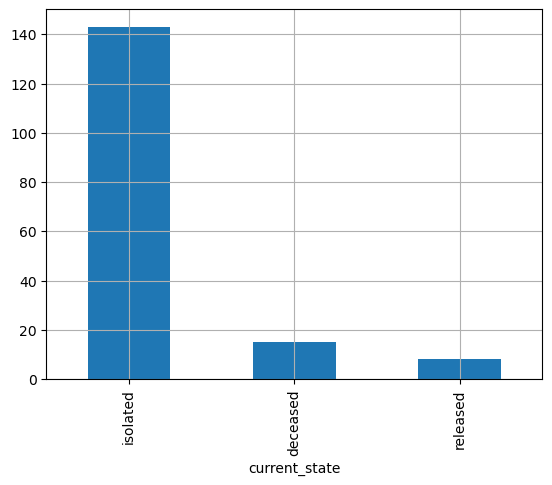

In [148]:
pasien.current_state.value_counts().plot.bar().grid()

Disini Kita Gambarkan Juga Grafik Untuk Melihat Data Berdasarkan Data Gender Dan Data Ini Dihitung Berdasarkan Kolom Current_state Pasien.

<Axes: xlabel='gender', ylabel='count'>

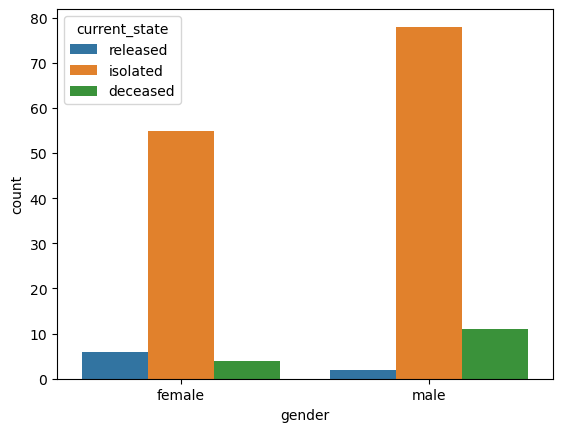

In [149]:
sns.countplot(x='gender', hue='current_state', data=pasien)

Tampilkan Grafik Data Pasien Berdasarkan Provinsi Dari Pasien Tersebut.

<Axes: xlabel='province'>

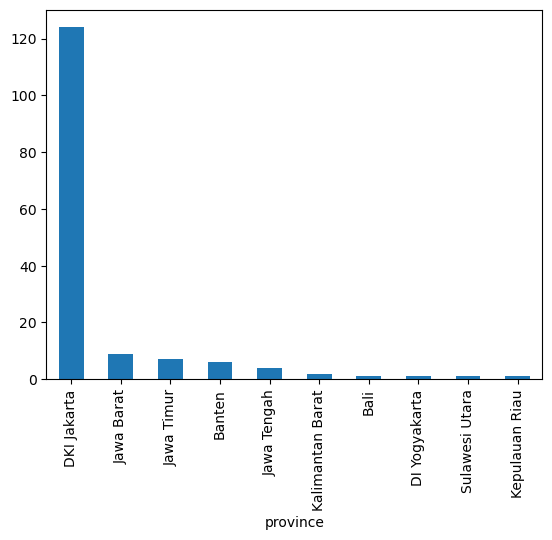

In [150]:
pasien.province.value_counts().plot.bar()

Sekarang Kita Lihat Banyaknya Pasien Yang Positif Covid-19 Beredasarkan Tanggal Terkonfirmasinya Dan Data Pasien Ini Ditampilkan Dalam Bentuk Grafik.

<Axes: xlabel='confirmed_date'>

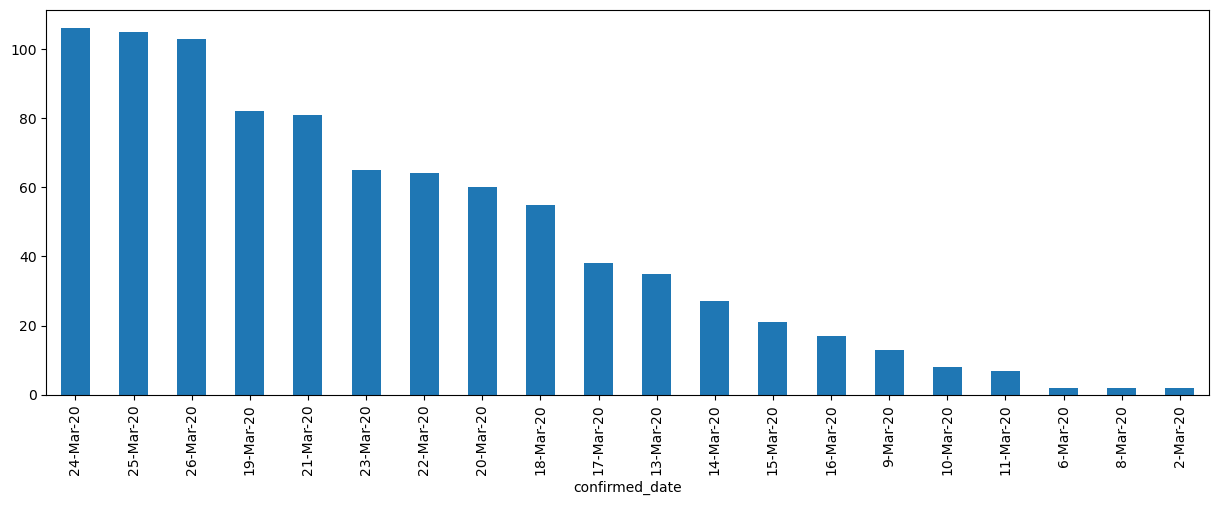

In [151]:
plt.figure(figsize=(15,5))
pasien.confirmed_date.value_counts().plot.bar()

In [152]:
provinsi.head(5)

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


Selanjutnya Kita Lihat Banyaknya Data Pada Dataset Dan Struktur Kolom Dari Dataset Ini.

In [153]:
print("Total Data : ", provinsi.shape,"\n")
provinsi.info()

Total Data :  (35, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   province_id          35 non-null     int64 
 1   province_name        35 non-null     object
 2   island               35 non-null     object
 3   iso_code             35 non-null     object
 4   capital_city         35 non-null     object
 5   population           35 non-null     int64 
 6   population_kmsquare  35 non-null     int64 
 7   confirmed            35 non-null     int64 
 8   deceased             35 non-null     int64 
 9   released             35 non-null     int64 
 10  longitude            35 non-null     object
 11  latitude             35 non-null     object
dtypes: int64(6), object(6)
memory usage: 3.4+ KB


Lalu Kita Hitung Banyaknya Data Berdasarkan Pengelompokan Kolom Island (Pulau).

In [154]:
provinsi['island'].value_counts()

island
Sumatra                    10
Jawa                        6
Sulawesi                    6
Kalimantan                  5
Kepulauan Nusa Tenggara     3
Kepulauan Maluku            2
Papua                       2
Unknown                     1
Name: count, dtype: int64

Method FungsiGroup Yang Digunakan Untuk Menghitung Banyaknya Jumlah Korban Yang Terkonfirmasi Covid-19.

Deklarasikan Sintak Atau Method Yang Digunakan Untuk Menghitung Banyaknya Jumlah Korban Yang Terkonfirmasi Covid-19.

In [155]:
def FungsiGroup(column, ds):
  dataset = ds
  print((dataset.groupby(column).sum()[['confirmed']]).sort_values(by=column, ascending=False))

In [156]:
FungsiGroup('island', provinsi)

                         confirmed
island                            
Unknown                         20
Sumatra                         29
Sulawesi                        35
Papua                            7
Kepulauan Nusa Tenggara         11
Kepulauan Maluku                 2
Kalimantan                      22
Jawa                           911


Sintak Dibawah Ini Digunakan Untuk Memasukkan Data Pengelompokan Pasien Yang Terkonfirmasi Tadi Ke Dalam Variabel Baru Untuk Proses Perhitungan Linear Regresi.

Sintak Dibawah Ini Digunakan Untuk Memasukkan Data Pengelompokan Pasien Yang Terkonfirmasi Tadi Ke Dalam Variabel Baru Untuk Proses Perhitungan Linear Regresi.

In [157]:
df =  pd.DataFrame((provinsi.groupby('island').sum()[['confirmed']]).sort_values(by='island', ascending=False))
df.head()

,confirmed
island,
Unknown,20
Sumatra,29
Sulawesi,35
Papua,7
Kepulauan Nusa Tenggara,11


Selanjutnya Kita Ubah Dan Hapus Index Dari Kolom Island Tersebut Dan Simpan Pada Kolom Island Baru.

In [158]:
df['island']=df.index
df.reset_index(drop=True, inplace=True)

Lalu Tampilkan Data Dari Kolom Island Dan Kolom Confirmed Serta Tampilkan 5 Data Pertama Dari Kolom Ini.

In [159]:
df = df[['island', 'confirmed']]
df.head()

,island,confirmed
0,Unknown,20
1,Sumatra,29
2,Sulawesi,35
3,Papua,7
4,Kepulauan Nusa Tenggara,11


Sintak Dibawah Ini Digunakan Untuk Membuat Grafik Pie Untuk Menampilkan Jumlah Pasien Yang Terkonfirmasi Berdasarkan Kolom Island.

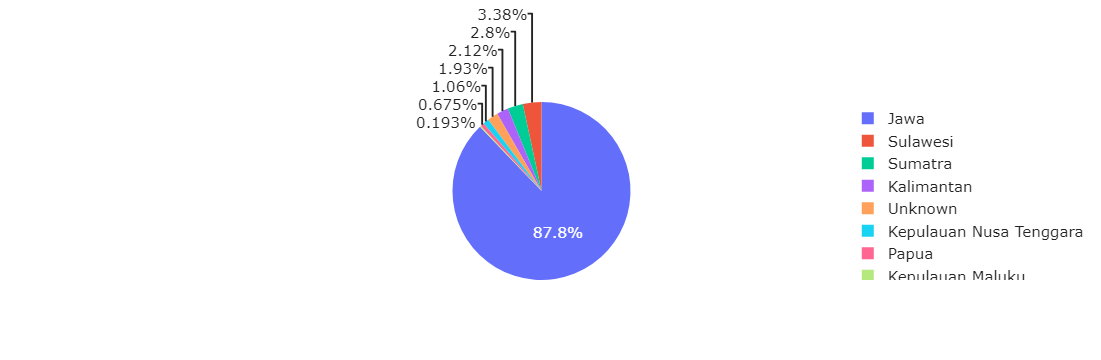

In [160]:
import plotly.express as px
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
fig = px.pie( values=df['confirmed'],names=df['island'])
fig.update_layout(font=dict(size=15, color="#242323"))   
    
py.iplot(fig)

Lalu Kita Copy Data Dari Dataset Provinsi Tadi Ke Dalam Variabel Baru. Disini Kita Hanya Menggunakan Beberapa Kolom Data Saja.

In [161]:
dataset = provinsi[['province_name', 'capital_city', 'population_kmsquare', 'confirmed', 'deceased']]
dataset.head()

,province_name,capital_city,population_kmsquare,confirmed,deceased
0,Aceh,Banda Aceh,86,4,0
1,Bali,Denpasar,738,9,2
2,Banten,Serang,1298,84,4
3,Bengkulu,Bengkulu,93,0,0
4,DI Yogyakarta,Yogyakarta,1134,22,2


Lalu Kita Cek Banyaknya Nilai Null Dari Setiap Kolom Dari Variabel Yang Baru Saja Di Buat.

In [162]:
dataset.isnull().sum()

province_name          0
capital_city           0
population_kmsquare    0
confirmed              0
deceased               0
dtype: int64

Sintak Ini Digunakan Untuk Meng-Copy Data Dari Variabel Yang Kita Buat Tadi Ke Dalam Variabel Baru. Variabel Ini Digunakan Untuk Proses Linear Regresi.

In [163]:
dtLR = dataset.copy()
print(dtLR.shape)
dtLR.head()

(35, 5)


,province_name,capital_city,population_kmsquare,confirmed,deceased
0,Aceh,Banda Aceh,86,4,0
1,Bali,Denpasar,738,9,2
2,Banten,Serang,1298,84,4
3,Bengkulu,Bengkulu,93,0,0
4,DI Yogyakarta,Yogyakarta,1134,22,2


Konversi kolom ke tipe numerik, ganti nilai error dengan NaN

In [164]:
dataset_numeric = dataset.apply(lambda col: pd.to_numeric(col, errors='coerce'))

Hapus kolom yang seluruhnya berisi NaN

In [165]:
dataset_numeric = dataset_numeric.dropna(axis=1, how='all')

Hapus baris yang mengandung NaN

In [166]:
dataset_cleaned = dataset_numeric.dropna()

Membuat heatmap dengan data yang telah dibersihkan

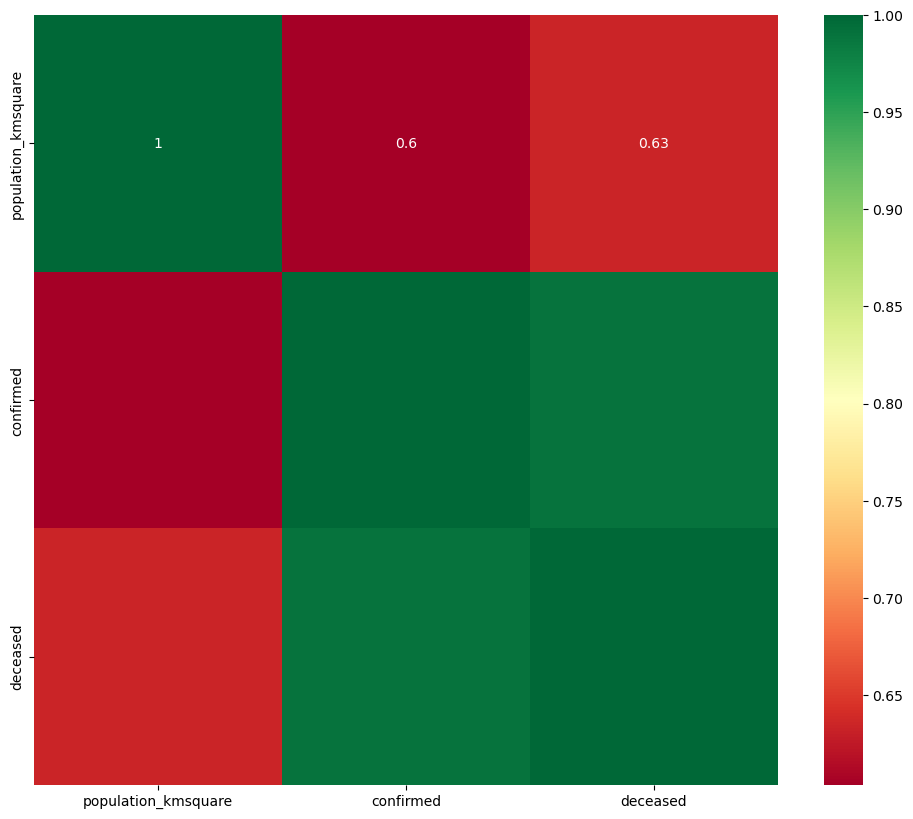

In [167]:
plt.figure(figsize=(12, 10))
p = sns.heatmap(dataset_cleaned.corr(), annot=True, cmap='RdYlGn')
plt.show()

Sintak Dibawah Ini Digunakn Untuk Menghapus Kolom-Kolom Yang Memiliki Relasi Paling Kecil.

In [168]:
dtLR = dtLR.drop(['province_name','capital_city','population_kmsquare'], axis=1)
dtLR.head(5)

,confirmed,deceased
0,4,0
1,9,2
2,84,4
3,0,0
4,22,2


Lalu Kita Pisahkan Data Ke Dalam Variabel X Dan Y Untuk Proses Analisa Linear Regresi.

In [169]:
#-----Proses linear regression
X_LR=dtLR.iloc[:, :-1].values
Y_LR=dtLR.iloc[:, 1].values

Sintak Dibawah Ini Digunakan Untuk Mendefinisikan Data Testing Dan Training Yang Digunakan.

In [170]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_LR, Y_LR, test_size = 0.20, random_state = 0)

Deklarasikan Sintak Untuk Linear Regresi Tersebut Serta Panggil Data Training Yang Digunakan.

In [171]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_1, y_train_1)

LinearRegression()

Sintak Dibawah Ini Digunakan Untuk Melakukan Proses Prediksi Data Testing Yang Kita Gunakan.

In [172]:
pred = regressor.predict(X_test_1)

Lalu Kita Gambarkan Sebaran Data Dan Hubungan Antar Kolom Dari Kolom Confirmed Dan Deceased.

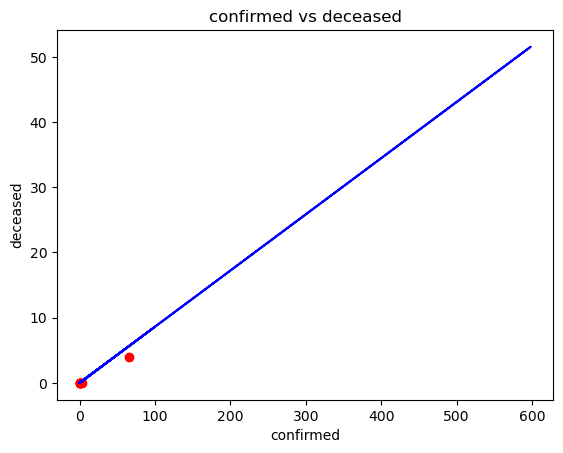

In [173]:
plt.scatter(X_test_1, y_test_1, color = 'red')
plt.plot(X_train_1, regressor.predict(X_train_1), color = 'blue' )
plt.title('confirmed vs deceased')
plt.xlabel('confirmed')
plt.ylabel('deceased')
plt.show()